In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as img


In [ ]:
(train_image, train_label), (test_image, test_label)=datasets.mnist.load_data()

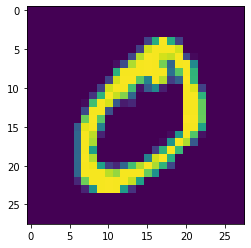

In [ ]:
plt.imshow(train_image[1])

In [ ]:
train_image[1].shape

(28, 28)

In [ ]:
np.shape(train_image[2])

(28, 28)

In [ ]:
train_image, test_image=train_image/255, test_image/255

In [ ]:
model=models.Sequential()
#flatten
model.add(layers.Flatten(input_shape=(28,28))) 
#first Dense layer
model.add(layers.Dense(256, activation='relu'))
#second Dense layer
model.add(layers.Dense(256, activation='relu'))
#third Dense layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history=model.fit(train_image,train_label,epochs=10,validation_data=(test_image, test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2031 - accuracy: 0.9385 - val_loss: 0.1442 - val_accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9737 - val_loss: 0.0981 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0833 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.1034 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0802 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0818 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.1129 - val_accuracy:

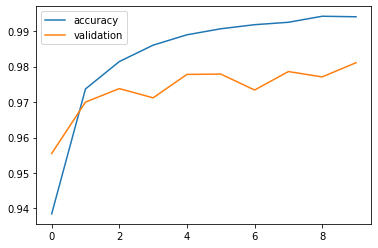

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [ ]:
test_loss, test_acc=model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9811


In [ ]:
test_acc

0.9811000227928162

In [ ]:
test_image[1].shape

(28, 28)

In [ ]:
test=test_image[1].reshape(-1,28,28)

In [ ]:
test.shape

(1, 28, 28)

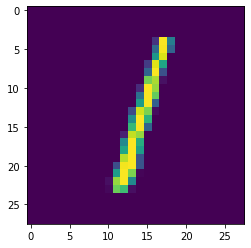

In [ ]:
plt.imshow(test_image[2])

In [ ]:
model.predict(test)

array([[1.3025007e-11, 1.6211864e-07, 9.9999988e-01, 3.0575309e-10,
        3.0701133e-17, 2.2518246e-15, 1.3127870e-14, 1.2285492e-10,
        4.8355590e-14, 3.1932863e-19]], dtype=float32)

In [ ]:
np.sum(model.predict(test))

1.0

In [ ]:
class_name=[0, 1, 2, 3, 4, 5, 6,
            7, 8, 9]

In [ ]:
def predict(image):
  input1=image.reshape(-1,28,28)
  index=np.argmax(model.predict(input1))
  return class_name[index]

In [ ]:
predict(test_image[4])

4

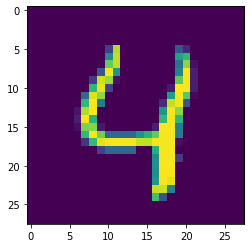

In [ ]:
plt.imshow(test_image[4])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
one=img.imread('/content/drive/MyDrive/handwrite-numbers/8.jpg')

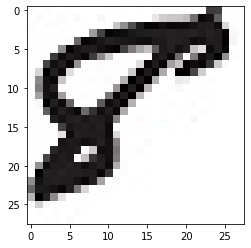

In [ ]:
plt.imshow(one)

In [ ]:
predict(one)

2